## Error assessments and model correlations

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import regression_estimators
import error_assessments
import plotting

In [2]:
# set plot font to Arial
use_liberation_fonts = True
if use_liberation_fonts:
    plt.rcParams.update({
        'font.family':'sans-serif',
        'font.sans-serif':['Liberation Sans'],
    })

# Utsjoki

## Valle (Utsjoki) elevation calculation from ASV

In [3]:
# read in data
valle_asv = pd.read_csv('../data/output/0.25/valle_ASV_validation_table.csv', delimiter=',')

In [4]:
# check
valle_asv.head()

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,NumberOfPo,NumberOfSa,Day,TSC3Time,TSC3UTC,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1
0,valle1,7757608.695,500041.929,66.016,69.925891,27.001095,90.322226,0.005,0.011,1.2,...,3,24,18.6.2023,10:33:18.000,7:33:18,2267,27216,2267,27218,-2.185422
1,valle2,7757602.595,500041.839,66.272,69.925836,27.001092,90.577668,0.005,0.011,1.6,...,3,23,18.6.2023,10:33:38.000,7:33:38,2267,27236,2267,27238,-2.295642
2,valle3,7757600.166,500048.506,65.981,69.925814,27.001266,90.286394,0.005,0.011,1.6,...,3,23,18.6.2023,10:34:10.000,7:34:10,2267,27268,2267,27270,-2.227414
3,valle4,7757596.831,500055.210,65.670,69.925784,27.001441,89.975550,0.005,0.011,1.6,...,3,23,18.6.2023,10:34:39.000,7:34:39,2267,27297,2267,27299,-2.275396
4,valle5,7757597.569,500059.478,65.275,69.925791,27.001553,89.580965,0.005,0.011,1.6,...,4,23,18.6.2023,10:35:05.000,7:35:05,2267,27322,2267,27325,-2.236089


In [5]:
# set water level
valle_asv['PointLocation_Elevation'] = 66.016000
valle_asv.head()

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,NumberOfSa,Day,TSC3Time,TSC3UTC,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1,PointLocation_Elevation
0,valle1,7757608.695,500041.929,66.016,69.925891,27.001095,90.322226,0.005,0.011,1.2,...,24,18.6.2023,10:33:18.000,7:33:18,2267,27216,2267,27218,-2.185422,66.016
1,valle2,7757602.595,500041.839,66.272,69.925836,27.001092,90.577668,0.005,0.011,1.6,...,23,18.6.2023,10:33:38.000,7:33:38,2267,27236,2267,27238,-2.295642,66.016
2,valle3,7757600.166,500048.506,65.981,69.925814,27.001266,90.286394,0.005,0.011,1.6,...,23,18.6.2023,10:34:10.000,7:34:10,2267,27268,2267,27270,-2.227414,66.016
3,valle4,7757596.831,500055.210,65.670,69.925784,27.001441,89.975550,0.005,0.011,1.6,...,23,18.6.2023,10:34:39.000,7:34:39,2267,27297,2267,27299,-2.275396,66.016
4,valle5,7757597.569,500059.478,65.275,69.925791,27.001553,89.580965,0.005,0.011,1.6,...,23,18.6.2023,10:35:05.000,7:35:05,2267,27322,2267,27325,-2.236089,66.016


In [6]:
# check columns
valle_asv.columns

Index(['PointNo', 'Northing', 'Easting', 'Elevation', 'Latitude', 'Longitude',
       'Height', 'Horizontal', 'VerticalSt', 'PDOP', 'HDOP', 'VDOP',
       'NumberOfPo', 'NumberOfSa', 'Day', 'TSC3Time', 'TSC3UTC', 'StartGPSwe',
       'StartGPSse', 'EndGPSweek', 'EndGPSseco', 'SAMPLE_1',
       'PointLocation_Elevation'],
      dtype='object')

In [7]:
# remove unnecessary columns
valle_asv = valle_asv.drop(columns=['Horizontal', 'VerticalSt', 'PDOP', 'HDOP', 'VDOP',
       'NumberOfPo', 'NumberOfSa', 'Day', 'TSC3Time', 'TSC3UTC', 'StartGPSwe',
       'StartGPSse', 'EndGPSweek', 'EndGPSseco'])

In [8]:
# rename column
valle_asv = valle_asv.rename(columns={"SAMPLE_1": "ASV_Depth"})

In [9]:
# calculate elevation for asv data
valle_asv['ASV_Elevation'] = valle_asv['PointLocation_Elevation'] + valle_asv['ASV_Depth']

In [10]:
valle_asv.head()

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,ASV_Depth,PointLocation_Elevation,ASV_Elevation
0,valle1,7757608.695,500041.929,66.016,69.925891,27.001095,90.322226,-2.185422,66.016,63.830578
1,valle2,7757602.595,500041.839,66.272,69.925836,27.001092,90.577668,-2.295642,66.016,63.720358
2,valle3,7757600.166,500048.506,65.981,69.925814,27.001266,90.286394,-2.227414,66.016,63.788586
3,valle4,7757596.831,500055.210,65.670,69.925784,27.001441,89.975550,-2.275396,66.016,63.740604
4,valle5,7757597.569,500059.478,65.275,69.925791,27.001553,89.580965,-2.236089,66.016,63.779911


## Compute RMSE, MAE and MRE

In [11]:
# set values to list to perform error calculations
actual = valle_asv['Elevation'].values.tolist()
predicted = valle_asv['ASV_Elevation'].values.tolist()

In [12]:
# calculate error assessments for Valle ASV
print(f"Root Mean Square Error: {error_assessments.root_mean_sq_err(actual=actual, predicted=predicted)}")
print(f"Root Mean Square Error: {error_assessments.mean_abs_err(actual=actual, predicted=predicted)}")
print(f"Root Mean Square Error: {error_assessments.max_err(actual=actual, predicted=predicted)}")

Root Mean Square Error: 1.7838706318406874
Root Mean Square Error: 1.4331780161290262
Root Mean Square Error: 4.261111999999997


In [13]:
# calculate correlation
valle_asv["Elevation"].corr(valle_asv["ASV_Elevation"])

-0.6676671869128503

## Valle (Utsjoki) elevation calculation from ALS

In [14]:
# read in als data
valle_als = pd.read_csv('../data/output/0.25/valle_ALS_validation_table.csv', delimiter=',')

In [15]:
valle_als

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1,SAMPLE_2,SAMPLE_3,SAMPLE_4,SAMPLE_5,SAMPLE_6
0,valle1,7757608.695,500041.929,66.016,69.925891,27.001095,90.322226,0.005,0.011,1.2,...,2267,27216,2267,27218,90.10,90.87,90.534211,90.529521,19,0.283592
1,valle2,7757602.595,500041.839,66.272,69.925836,27.001092,90.577668,0.005,0.011,1.6,...,2267,27236,2267,27238,90.33,91.17,90.780000,90.763832,19,0.298170
2,valle3,7757600.166,500048.506,65.981,69.925814,27.001266,90.286394,0.005,0.011,1.6,...,2267,27268,2267,27270,90.09,90.89,90.543684,90.501440,19,0.274115
3,valle4,7757596.831,500055.210,65.670,69.925784,27.001441,89.975550,0.005,0.011,1.6,...,2267,27297,2267,27299,89.85,90.70,90.234615,90.273429,13,0.286668
4,valle5,7757597.569,500059.478,65.275,69.925791,27.001553,89.580965,0.005,0.011,1.6,...,2267,27322,2267,27325,89.35,90.12,89.697500,89.776826,12,0.299308
5,valle6,7757599.554,500062.164,65.144,69.925809,27.001623,89.449445,0.005,0.010,1.5,...,2267,27415,2267,27418,89.09,89.91,89.513500,89.484570,20,0.261348
6,valle7,7757602.512,500058.781,65.307,69.925835,27.001534,89.612676,0.006,0.012,1.5,...,2267,27443,2267,27446,89.28,90.08,89.665714,89.627307,14,0.294005
7,valle8,7757603.885,500062.909,64.937,69.925848,27.001642,89.241923,0.005,0.011,1.5,...,2267,27494,2267,27497,88.81,89.82,89.280625,89.283817,16,0.304846
8,valle9,7757607.669,500064.868,64.808,69.925882,27.001693,89.112957,0.005,0.010,1.5,...,2267,27531,2267,27533,88.68,89.72,89.158889,89.119383,18,0.285363
9,valle10,7757612.643,500063.606,64.737,69.925926,27.001660,89.041733,0.005,0.010,1.5,...,2267,27566,2267,27568,88.62,89.38,89.017143,89.018575,14,0.239834


In [16]:
# remove unnecessary columns
valle_als = valle_als.drop(columns=['Horizontal', 'VerticalSt', 'PDOP', 'HDOP', 'VDOP',
       'NumberOfPo', 'NumberOfSa', 'Day', 'TSC3Time', 'TSC3UTC', 'StartGPSwe',
       'StartGPSse', 'EndGPSweek', 'EndGPSseco'])

In [17]:
valle_als = valle_als.rename(columns={"SAMPLE_4": "IDW"})

In [18]:
tolerance = 0.05

valle_als.loc[
    abs(valle_als['Height'] - valle_als['IDW']) < tolerance
]

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,SAMPLE_1,SAMPLE_2,SAMPLE_3,IDW,SAMPLE_5,SAMPLE_6
5,valle6,7757599.554,500062.164,65.144,69.925809,27.001623,89.449445,89.09,89.91,89.513500,89.484570,20,0.261348
6,valle7,7757602.512,500058.781,65.307,69.925835,27.001534,89.612676,89.28,90.08,89.665714,89.627307,14,0.294005
7,valle8,7757603.885,500062.909,64.937,69.925848,27.001642,89.241923,88.81,89.82,89.280625,89.283817,16,0.304846
8,valle9,7757607.669,500064.868,64.808,69.925882,27.001693,89.112957,88.68,89.72,89.158889,89.119383,18,0.285363
9,valle10,7757612.643,500063.606,64.737,69.925926,27.001660,89.041733,88.62,89.38,89.017143,89.018575,14,0.239834
15,valle16,7757621.391,500047.147,65.249,69.926005,27.001231,89.554811,89.20,89.99,89.520000,89.539189,22,0.259002
24,valle25,7757612.443,500049.549,65.464,69.925924,27.001293,89.769848,89.42,90.29,89.774000,89.804886,15,0.278993
26,valle27,7757616.059,500059.885,64.766,69.925957,27.001563,89.071451,88.69,89.71,89.066471,89.056792,17,0.285471


## Compute RMSE, MAE and MRE

In [19]:
# set actual (validation) values and predicted values and set them to list
actual = valle_als['Height'].values.tolist()
predicted = valle_als['IDW'].values.tolist()

# calculate error assessments for Valle ALS
print(f"Root Mean Square Error: {error_assessments.root_mean_sq_err(actual=actual, predicted=predicted)}")
print(f"Root Mean Square Error: {error_assessments.mean_abs_err(actual=actual, predicted=predicted)}")
print(f"Root Mean Square Error: {error_assessments.max_err(actual=actual, predicted=predicted)}")

Root Mean Square Error: 0.16526257931156874
Root Mean Square Error: 0.12614583495443576
Root Mean Square Error: 0.427248066521301


In [20]:
# calculate correlation
valle_als["Elevation"].corr(valle_als["IDW"])

0.9909561367290625

## Valle (Utsjoki) error assessments from SI

In [21]:
# read in SI data
valle_s2 = pd.read_csv('../data/output/satellite-analysis/valle_s2_validationpoints.csv', delimiter=',')

# check
valle_s2.head()

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,NumberOfPo,NumberOfSa,Day,TSC3Time,TSC3UTC,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1
0,valle1,7757608.695,500041.929,66.016,69.925891,27.001095,90.322226,0.005,0.011,1.2,...,3,24,18.6.2023,10:33:18.000,7:33:18,2267,27216,2267,27218,77.166353
1,valle2,7757602.595,500041.839,66.272,69.925836,27.001092,90.577668,0.005,0.011,1.6,...,3,23,18.6.2023,10:33:38.000,7:33:38,2267,27236,2267,27238,77.166353
2,valle3,7757600.166,500048.506,65.981,69.925814,27.001266,90.286394,0.005,0.011,1.6,...,3,23,18.6.2023,10:34:10.000,7:34:10,2267,27268,2267,27270,77.166353
3,valle4,7757596.831,500055.210,65.670,69.925784,27.001441,89.975550,0.005,0.011,1.6,...,3,23,18.6.2023,10:34:39.000,7:34:39,2267,27297,2267,27299,71.463242
4,valle5,7757597.569,500059.478,65.275,69.925791,27.001553,89.580965,0.005,0.011,1.6,...,4,23,18.6.2023,10:35:05.000,7:35:05,2267,27322,2267,27325,71.463242


In [22]:
valle_s2 = valle_s2.rename(columns={"SAMPLE_1": "SI_Elevation"})

In [23]:
# set actual (validation) values and predicted values and set them to list
actual = valle_s2['Elevation'].values.tolist()
predicted = valle_s2['SI_Elevation'].values.tolist()

# calculate error assessments for Valle ALS
print(f"Root Mean Square Error: {error_assessments.root_mean_sq_err(actual=actual, predicted=predicted)}")
print(f"Root Mean Square Error: {error_assessments.mean_abs_err(actual=actual, predicted=predicted)}")
print(f"Root Mean Square Error: {error_assessments.max_err(actual=actual, predicted=predicted)}")

# calculate correlation
r_value = valle_s2["Elevation"].corr(valle_s2["SI_Elevation"])
print(f"Correlation: {r_value}")

Root Mean Square Error: 6.2266361391957075
Root Mean Square Error: 4.477381264924046
Root Mean Square Error: 12.82963485102401
Correlation: 0.9108957232538744


In [24]:
# calculate R$^2$
model = LinearRegression()
x = valle_s2[['Elevation']]
y = valle_s2[['SI_Elevation']]

model.fit(x, y)
r2 = regression_estimators.r_sq(model=model, x=x, y=y)

In [25]:
def setup_utsjoki_ax(ax):
    xlim = (62, 68)
    ylim = (62, 85)
    #ax.set_aspect('equal')
    plt.yticks(np.arange(min(ylim)+1, max(ylim)+1, 5))
    plt.xticks(np.arange(min(xlim), max(xlim)+1, 1))
    ax.set(xlim=xlim, ylim=ylim)

def setup_nuorgam_ax(ax):
    xlim = (11.5, 14.5)
    ylim = (11.5, 22)
    #ax.set_aspect('equal')
    plt.yticks(np.arange(min(ylim)+1, max(ylim)+1, 2))
    plt.xticks(np.arange(min(xlim), max(xlim)+1, 1))
    ax.set(xlim=xlim, ylim=ylim)

Text(0.37, 0.5, 'R$^2$: 0.83')

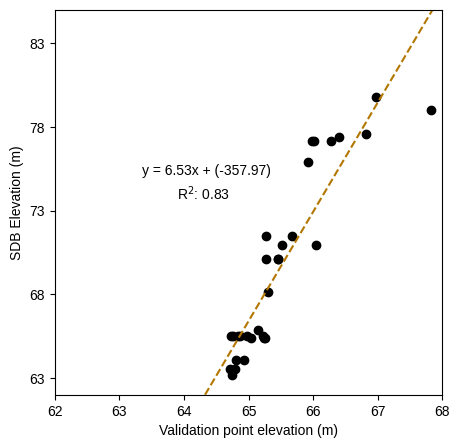

In [26]:
predict = model.predict(x)

fig, ax = plt.subplots(figsize=(5,5))

#regression part
intercept = regression_estimators.interc(model=model)
slope = regression_estimators.coeff(model=model)

#ax.set_title('Utsjoki ALS elevation correlation')
ax.set_xlabel("Validation point elevation (m)")
ax.set_ylabel("SDB Elevation (m)")

setup_utsjoki_ax(ax)

#ax.plot(x, predict, color='#B37700', linestyle='--', zorder=0)
ax.scatter(x, y, color='black', zorder=1)
# plot fitted y = m*x + b
ax.axline(xy1=(0, intercept), slope=slope, color='#B37700', linestyle='--')
#fit_eqn = f'$y = {slope:.2f}x{intercept:+.2f}$'
fit_eqn2 = "y = {:4.2f}x + ({:4.2f})".format(slope, intercept)

fig.text(0.3, 0.55, fit_eqn2, fontsize=10)
fig.text(0.37, 0.50, f'R$^2$: {round(r2, 2)}', fontsize=10)

In [27]:
#fig.savefig('../plots/valle_s2_correlation.png')
# save as png
plotting.save_plot(fig=fig, name='valle_s2_validation_correlation', dpi=600)

# Nuorgam

## Nuorgam error assessments from SI

In [28]:
# read in s2 data
nuorgam_s2 = pd.read_csv('../data/output/satellite-analysis/nuorgam_s2_validationpoints.csv', delimiter=',')
nuorgam_s2 = nuorgam_s2.rename(columns={"SAMPLE_1": "SI_Elevation"})

In [29]:
# set actual (validation) values and predicted values and set them to list
actual = nuorgam_s2['Elevation'].values.tolist()
predicted = nuorgam_s2['SI_Elevation'].values.tolist()

# calculate error assessments for Valle ALS
print(f"Root Mean Square Error: {error_assessments.root_mean_sq_err(actual=actual, predicted=predicted)}")
print(f"Root Mean Square Error: {error_assessments.mean_abs_err(actual=actual, predicted=predicted)}")
print(f"Root Mean Square Error: {error_assessments.max_err(actual=actual, predicted=predicted)}")

# calculate correlation
r_value = nuorgam_s2["Elevation"].corr(nuorgam_s2["SI_Elevation"])
print(f"Correlation: {r_value}")

Root Mean Square Error: 2.0283431283076903
Root Mean Square Error: 1.220690510347239
Root Mean Square Error: 6.911938037974
Correlation: 0.7547388422397808


In [30]:
#model = LinearRegression()
x = nuorgam_s2[['Elevation']]
y = nuorgam_s2[['SI_Elevation']]

model.fit(x, y)

r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

R-squared value: 0.5696307199854447


Text(0.25, 0.65, 'r=0.7547388422397808')

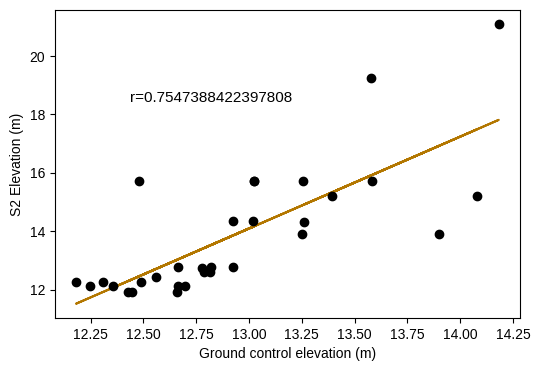

In [31]:
fig, ax = plt.subplots(figsize=(6, 4))

#ax.set_title('Utsjoki ALS elevation correlation')
ax.set_xlabel("Ground control elevation (m)")
ax.set_ylabel("S2 Elevation (m)")


ax.plot(x, model.predict(x), color='#B37700', linestyle='solid', zorder=0)
ax.scatter(x, y, color='black', zorder=1)
fig.text(0.25, 0.65, f'r={r_value}', fontsize=11)

In [32]:
#fig.savefig('../plots/nuorgam_s2_correlation.png')

## Nuorgam elevation calculation from ASV

In [33]:
# read in Nuorgam asv data
nuorgam_asv = pd.read_csv('../data/output/0.25/nuorgam_ASV_validation_table.csv', delimiter=',')

In [34]:
# set water level
nuorgam_asv['PointLocation_Elevation'] = 13.395000000000000

In [35]:
# check
nuorgam_asv.head()

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,NumberOfSa,Day,TSC3Time,TSC3UTC,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1,PointLocation_Elevation
0,nuorgamchool1,7775288.735,532936.157,13.576,70.082332,27.866296,36.386226,0.005,0.012,1.3,...,25,17.6.2023,18:13:01.000,15:13:01,2266,573198,2266,573201,-1.571486,13.395
1,nuorgamchool2,7775288.560,532940.543,14.183,70.082330,27.866411,36.993443,0.006,0.012,1.3,...,25,17.6.2023,18:13:22.000,15:13:22,2266,573217,2266,573221,-1.582583,13.395
2,nuorgamchool3,7775292.913,532940.301,13.258,70.082369,27.866406,36.068643,0.005,0.011,1.3,...,25,17.6.2023,18:13:43.000,15:13:43,2266,573239,2266,573242,-1.568659,13.395
3,nuorgamchool4,7775294.915,532947.208,13.582,70.082386,27.866589,36.391510,0.005,0.011,1.3,...,25,17.6.2023,18:14:02.000,15:14:02,2266,573259,2266,573261,-1.579846,13.395
4,nuorgamchool5,7775297.442,532950.578,13.394,70.082408,27.866678,36.204099,0.005,0.011,1.3,...,25,17.6.2023,18:14:20.000,15:14:20,2266,573277,2266,573279,-1.579843,13.395


In [36]:
# remove unnecessary columns
nuorgam_asv = nuorgam_asv.drop(columns=['Horizontal', 'VerticalSt', 'PDOP', 'HDOP', 'VDOP',
       'NumberOfPo', 'NumberOfSa', 'Day', 'TSC3Time', 'TSC3UTC', 'StartGPSwe',
       'StartGPSse', 'EndGPSweek', 'EndGPSseco'])

In [37]:
# rename and set ASV elevation to its own column
nuorgam_asv = nuorgam_asv.rename(columns={"SAMPLE_1": "ASV_Depth"})
nuorgam_asv['ASV_Elevation'] = nuorgam_asv['PointLocation_Elevation'] + nuorgam_asv["ASV_Depth"]
# drop no values is any
nuorgam_asv = nuorgam_asv.dropna()

## Compute RMSE, MAE and MRE

In [38]:
# set actual (validation) values and predicted values and set them to list
actual = nuorgam_asv['Elevation'].values.tolist()
predicted = nuorgam_asv['ASV_Elevation'].values.tolist()

# calculate error assessments for Valle ALS
print(f"Root Mean Square Error: {error_assessments.root_mean_sq_err(actual=actual, predicted=predicted)}")
print(f"Root Mean Square Error: {error_assessments.mean_abs_err(actual=actual, predicted=predicted)}")
print(f"Root Mean Square Error: {error_assessments.max_err(actual=actual, predicted=predicted)}")

# calculate correlation
r_value = nuorgam_asv["Elevation"].corr(nuorgam_asv["ASV_Elevation"])
print(f"Correlation: {r_value}")

Root Mean Square Error: 1.1568474726087066
Root Mean Square Error: 1.0201863400000006
Root Mean Square Error: 2.3705827
Correlation: -0.5849616743501534


## Nuorgam elevation calculation from ALS

In [39]:
# read in ALS data
nuorgam_als = pd.read_csv('../data/output/0.25/nuorgam_ALS_validation_table.csv', delimiter=',')
# check
nuorgam_als.head()

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1,SAMPLE_2,SAMPLE_3,SAMPLE_4,SAMPLE_5,SAMPLE_6
0,nuorgamchool1,7775288.735,532936.157,13.576,70.082332,27.866296,36.386226,0.005,0.012,1.3,...,2266,573198,2266,573201,13.56,13.82,13.680000,13.688744,6,0.086410
1,nuorgamchool2,7775288.560,532940.543,14.183,70.082330,27.866411,36.993443,0.006,0.012,1.3,...,2266,573217,2266,573221,13.79,14.26,14.051429,14.062061,7,0.144956
2,nuorgamchool3,7775292.913,532940.301,13.258,70.082369,27.866406,36.068643,0.005,0.011,1.3,...,2266,573239,2266,573242,13.21,13.32,13.280000,13.286187,5,0.037417
3,nuorgamchool4,7775294.915,532947.208,13.582,70.082386,27.866589,36.391510,0.005,0.011,1.3,...,2266,573259,2266,573261,13.61,13.68,13.655000,13.643451,4,0.026926
4,nuorgamchool5,7775297.442,532950.578,13.394,70.082408,27.866678,36.204099,0.005,0.011,1.3,...,2266,573277,2266,573279,13.44,13.51,13.476667,13.468317,3,0.028674


In [40]:
# remove unnecessary columns
nuorgam_als = nuorgam_als.drop(columns=['Horizontal', 'VerticalSt', 'PDOP', 'HDOP', 'VDOP',
       'NumberOfPo', 'NumberOfSa', 'Day', 'TSC3Time', 'TSC3UTC', 'StartGPSwe',
       'StartGPSse', 'EndGPSweek', 'EndGPSseco'])
# rename
nuorgam_als = nuorgam_als.rename(columns={"SAMPLE_4": "ALS_Elevation"})
# check
nuorgam_als.head()

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,SAMPLE_1,SAMPLE_2,SAMPLE_3,ALS_Elevation,SAMPLE_5,SAMPLE_6
0,nuorgamchool1,7775288.735,532936.157,13.576,70.082332,27.866296,36.386226,13.56,13.82,13.680000,13.688744,6,0.086410
1,nuorgamchool2,7775288.560,532940.543,14.183,70.082330,27.866411,36.993443,13.79,14.26,14.051429,14.062061,7,0.144956
2,nuorgamchool3,7775292.913,532940.301,13.258,70.082369,27.866406,36.068643,13.21,13.32,13.280000,13.286187,5,0.037417
3,nuorgamchool4,7775294.915,532947.208,13.582,70.082386,27.866589,36.391510,13.61,13.68,13.655000,13.643451,4,0.026926
4,nuorgamchool5,7775297.442,532950.578,13.394,70.082408,27.866678,36.204099,13.44,13.51,13.476667,13.468317,3,0.028674


## Compute RMSE, MAE and MRE

In [41]:
# set actual (validation) values and predicted values and set them to list
actual = nuorgam_als['Elevation'].values.tolist()
predicted = nuorgam_als['ALS_Elevation'].values.tolist()

# calculate error assessments for Valle ALS
print(f"Root Mean Square Error: {error_assessments.root_mean_sq_err(actual=actual, predicted=predicted)}")
print(f"Root Mean Square Error: {error_assessments.mean_abs_err(actual=actual, predicted=predicted)}")
print(f"Root Mean Square Error: {error_assessments.max_err(actual=actual, predicted=predicted)}")

# calculate correlation
r_value = nuorgam_als["Elevation"].corr(nuorgam_als["ALS_Elevation"])
print(f"Correlation: {r_value}")

Root Mean Square Error: 0.17681145003216284
Root Mean Square Error: 0.11840849070220001
Root Mean Square Error: 0.7277976715493999
Correlation: 0.9843482187090971


# Correlation from random sample Valle (Utsjoki)

In [42]:
# read in random points data
valle_corr_asv = pd.read_csv('../data/output/0.25/valle_ASV_IDW_random_points.csv', delimiter=',')
valle_corr_als = pd.read_csv('../data/output/0.25/valle_ALS_random_points.csv', delimiter=',')
valle_corr_s2 = pd.read_csv('../data/output/0.25/valle_S2_random_points.csv', delimiter=',')

In [43]:
# check
valle_corr_asv.head()
valle_corr_asv = valle_corr_asv.rename(columns={"SAMPLE_1": "ASV_Elevation"})

In [44]:
valle_corr_als.head()

,id,SAMPLE_1,SAMPLE_2,SAMPLE_3,SAMPLE_4,SAMPLE_5,SAMPLE_6
0,0,86.87,90.45,89.313750,88.430109,8,1.404118
1,1,87.54,89.83,88.417692,88.295792,13,0.788340
2,2,87.87,90.49,89.005714,89.052633,7,1.279742
3,3,87.38,89.82,88.089474,88.067866,19,0.962056
4,4,71.64,89.93,88.706333,88.751447,30,3.368034


In [45]:
valle_corr_s2.head()

,id,SAMPLE_1
0,0,61.842204
1,1,62.292449
2,2,62.339844
3,3,62.031781
4,4,61.842204


In [46]:
# merge information to asv df
valle_corr_asv["ALS_Elevation"] = valle_corr_als["SAMPLE_4"]
valle_corr_asv['SI_Elevation'] = valle_corr_s2['SAMPLE_1']

In [47]:
# check
valle_corr_asv.head()

,id,ASV_Elevation,ALS_Elevation,SI_Elevation
0,0,-3.567644,88.430109,61.842204
1,1,-2.655939,88.295792,62.292449
2,2,-2.994284,89.052633,62.339844
3,3,-2.806739,88.067866,62.031781
4,4,-3.178693,88.751447,61.842204


In [48]:
# drop no vales
valle_corr_asv = valle_corr_asv.dropna()

In [49]:
# calculate elevation following mean sea level
valle_corr_asv['ASV_N2000'] = valle_corr_asv['ASV_Elevation'] + 66.016
valle_corr_asv['ALS_N2000'] = valle_corr_asv['ALS_Elevation'] - 24.3

In [50]:
valle_corr_asv

,id,ASV_Elevation,ALS_Elevation,SI_Elevation,ASV_N2000,ALS_N2000
0,0,-3.567644,88.430109,61.842204,62.448356,64.130109
1,1,-2.655939,88.295792,62.292449,63.360061,63.995792
2,2,-2.994284,89.052633,62.339844,63.021716,64.752633
3,3,-2.806739,88.067866,62.031781,63.209261,63.767866
4,4,-3.178693,88.751447,61.842204,62.837307,64.451447
...,...,...,...,...,...,...
293,293,-3.387006,87.994366,62.079175,62.628994,63.694366
294,294,-2.996475,87.822089,62.063377,63.019525,63.522089
295,295,-3.361742,89.740000,61.921195,62.654258,65.440000
297,297,-1.837714,87.612876,63.137647,64.178286,63.312876


## Ruling out outliers and defining how much models differ from one another

In [51]:
# how many rows (points) falls under the tolerance of difference of 0.05, meaning no outliers
tolerance = 0.05

valle_corr_asv.loc[
    abs(valle_corr_asv['ALS_N2000'] - valle_corr_asv['ASV_N2000']) < tolerance
]

,id,ASV_Elevation,ALS_Elevation,SI_Elevation,ASV_N2000,ALS_N2000
6,6,-1.507389,88.793906,63.343022,64.508611,64.493906
7,7,-2.345879,87.952431,62.797988,63.670121,63.652431
28,28,-2.922626,87.350000,62.197661,63.093374,63.050000
29,29,-2.216536,88.132736,62.640007,63.799464,63.832736
37,37,-2.944977,87.376756,62.000184,63.071023,63.076756
74,74,-1.871322,88.445040,62.963869,64.144678,64.145040
97,97,-1.441238,88.861650,63.548397,64.574762,64.561650
112,112,-1.451746,88.867750,63.343022,64.564254,64.567750
127,127,-1.419986,88.891102,63.343022,64.596014,64.591102
137,137,-1.366608,88.942646,63.185041,64.649392,64.642646


In [52]:
difference = valle_corr_asv.drop(columns=
                                ['id', 'ASV_Elevation', 'ALS_Elevation'])

In [53]:
difference

,SI_Elevation,ASV_N2000,ALS_N2000
0,61.842204,62.448356,64.130109
1,62.292449,63.360061,63.995792
2,62.339844,63.021716,64.752633
3,62.031781,63.209261,63.767866
4,61.842204,62.837307,64.451447
...,...,...,...
293,62.079175,62.628994,63.694366
294,62.063377,63.019525,63.522089
295,61.921195,62.654258,65.440000
297,63.137647,64.178286,63.312876


In [54]:
cols = difference.columns.tolist()

In [55]:
cols = cols[-1:] + cols[:-1]

In [56]:
cols

['ALS_N2000', 'SI_Elevation', 'ASV_N2000']

In [57]:
difference = difference[cols]

In [58]:
difference_pct = difference.pct_change(axis=1)

In [59]:
#difference_diff = 
difference.diff(axis=1)

,ALS_N2000,SI_Elevation,ASV_N2000
0,NaN,-2.287906,0.606152
1,NaN,-1.703343,1.067612
2,NaN,-2.412789,0.681872
3,NaN,-1.736085,1.177480
4,NaN,-2.609243,0.995103
...,...,...,...
293,NaN,-1.615192,0.549819
294,NaN,-1.458711,0.956147
295,NaN,-3.518805,0.733063
297,NaN,-0.175229,1.040639


In [60]:
difference_pct['ASV_N2000'].mean()

0.014820218289995642

In [61]:
# calculation correlation
valle_corr_asv["ASV_N2000"].corr(valle_corr_asv["ALS_N2000"])  

-0.1520828076299012

# Correlation from random sample Nuorgam

In [62]:
nuorgam_corr_asv = pd.read_csv('../data/output/0.25/nuorgam_ASV_IDW_random_points.csv', delimiter=',')
nuorgam_corr_als = pd.read_csv('../data/output/0.25/nuorgam_ALS_random_points.csv', delimiter=',')
nuorgam_corr_s2 = pd.read_csv('../data/output/0.25/nuorgam_S2_random_points.csv', delimiter=',')

In [63]:
nuorgam_corr_asv.head()
nuorgam_corr_asv = nuorgam_corr_asv.rename(columns={"SAMPLE_1": "ASV_Elevation"})

In [64]:
# merge information to asv df
nuorgam_corr_asv["ALS_Elevation"] = nuorgam_corr_als["SAMPLE_4"]
nuorgam_corr_asv["SI_Elevation"] = nuorgam_corr_s2["SAMPLE_1"]
# check
nuorgam_corr_asv.head()

,id,ASV_Elevation,ALS_Elevation,SI_Elevation
0,0,-2.317614,10.314406,11.114025
1,1,-1.576809,12.159341,11.774339
2,2,-1.505205,11.635015,11.558467
3,3,-0.957730,12.461536,12.307670
4,4,-1.280672,12.158013,11.914022


In [65]:
# set water level to ASV
nuorgam_corr_asv['ASV_N2000'] = nuorgam_corr_asv['ASV_Elevation'] + 13.395

In [66]:
# drop no values
nuorgam_corr_asv = nuorgam_corr_asv.dropna()

In [67]:
model = LinearRegression()

In [68]:
# calculate linear regression for nuorgam als
x = nuorgam_corr_asv[['SI_Elevation']]
y = nuorgam_corr_asv[['ASV_N2000']]

In [69]:
model.fit(x, y)

r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

R-squared value: 0.6753532536409769


In [70]:
import matplotlib.pyplot as plt

Text(0.7, 0.25, 'r=0.82')

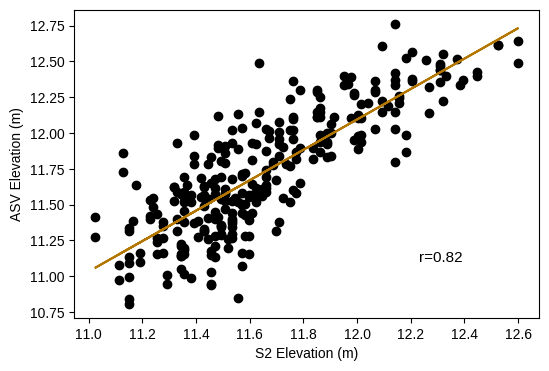

In [71]:
r_value = 0.82

fig, ax = plt.subplots(figsize=(6, 4))

#ax.set_title('Utsjoki ALS elevation correlation')
ax.set_xlabel("S2 Elevation (m)")
ax.set_ylabel("ASV Elevation (m)")


ax.plot(x, model.predict(x), color='#B37700', linestyle='solid', zorder=1)
ax.scatter(x, y, color='black', zorder=0)
fig.text(0.7, 0.25, f'r={r_value}', fontsize=11)

In [72]:
#fig.savefig('../plots/nuorgam_corr_asv-s2.png')

In [73]:
valle_corr_asv = valle_corr_asv.dropna()

In [74]:
# calculate linear regression for valle
x = valle_corr_asv[['ASV_N2000']]
y = valle_corr_asv[['SI_Elevation']]

In [75]:
model.fit(x, y)

r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

R-squared value: 0.7464489182281244


In [76]:
valle_corr_asv["ASV_N2000"].corr(valle_corr_asv["SI_Elevation"])  

0.8639727531746149

Text(0.3, 0.55, 'r=0.86')

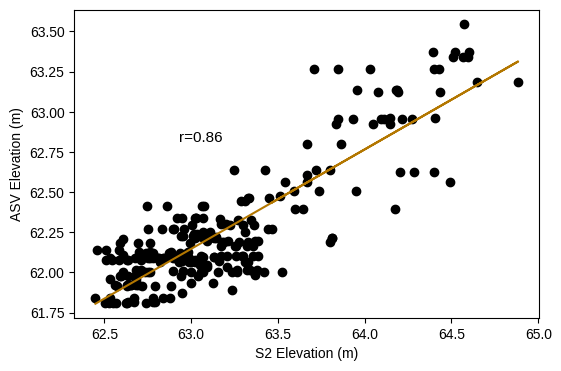

In [77]:
r_value = 0.86

fig, ax = plt.subplots(figsize=(6, 4))

#ax.set_title('Utsjoki ALS elevation correlation')
ax.set_xlabel("S2 Elevation (m)")
ax.set_ylabel("ASV Elevation (m)")


ax.plot(x, model.predict(x), color='#B37700', linestyle='solid', zorder=1)
ax.scatter(x, y, color='black', zorder=0)
fig.text(0.3, 0.55, f'r={r_value}', fontsize=11)

In [78]:
#fig.savefig('../plots/valle_corr_asv-s2.png')

In [79]:
nuorgam_corr_asv

,id,ASV_Elevation,ALS_Elevation,SI_Elevation,ASV_N2000
0,0,-2.317614,10.314406,11.114025,11.077386
1,1,-1.576809,12.159341,11.774339,11.818191
2,2,-1.505205,11.635015,11.558467,11.889795
3,3,-0.957730,12.461536,12.307670,12.437270
4,4,-1.280672,12.158013,11.914022,12.114328
...,...,...,...,...,...
295,295,-1.782876,11.110039,11.507674,11.612124
296,296,-2.111305,11.103198,11.469578,11.283695
297,297,-1.194525,11.862543,12.015608,12.200475
298,298,-1.991329,10.882804,11.444182,11.403671


# Linear Regression

In [80]:
# calculate linear regression for nuorgam als
x = nuorgam_als[['Elevation']]
y = nuorgam_als[['ALS_Elevation']]

In [81]:
model = LinearRegression()

In [82]:
model.fit(x, y)

r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

R-squared value: 0.9689414156757721


Text(0.35, 0.5, 'R$^2$: 0.97')

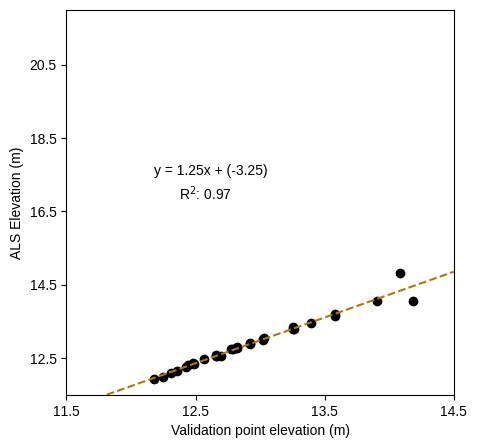

In [83]:
predict = model.predict(x)
r2 = regression_estimators.r_sq(model=model, x=x, y=y)

fig, ax = plt.subplots(figsize=(5,5))

#regression part
intercept = regression_estimators.interc(model=model)
slope = regression_estimators.coeff(model=model)

#ax.set_title('Utsjoki ALS elevation correlation')
ax.set_xlabel("Validation point elevation (m)")
ax.set_ylabel("ALS Elevation (m)")

setup_nuorgam_ax(ax)

#ax.plot(x, predict, color='#B37700', linestyle='--', zorder=0)
ax.scatter(x, y, color='black', zorder=1)
# plot fitted y = m*x + b
ax.axline(xy1=(0, intercept), slope=slope, color='#B37700', linestyle='--')
#fit_eqn = f'$y = {slope:.2f}x{intercept:+.2f}$'
fit_eqn2 = "y = {:4.2f}x + ({:4.2f})".format(slope, intercept)

fig.text(0.3, 0.55, fit_eqn2, fontsize=10)
fig.text(0.35, 0.50, f'R$^2$: {round(r2, 2)}', fontsize=10)

Text(0.6, 0.75, 'r=0.98')

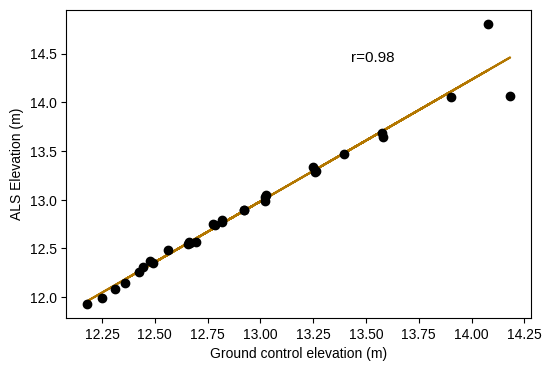

In [83]:
r_value = 0.98

fig, ax = plt.subplots(figsize=(6, 4))

#ax.set_title('Nuorgam ALS elevation correlation')
ax.set_xlabel("Ground control elevation (m)")
ax.set_ylabel("ALS Elevation (m)")


ax.plot(x, model.predict(x), color='#B37700', linestyle='solid', zorder=0)
ax.scatter(x, y, color='black', zorder=1)
fig.text(0.6, 0.75, f'r={r_value}', fontsize=11)

In [84]:
#fig.savefig('../plots/nuorgam_als_correlation.png')

In [85]:
# the same for ASV
x = nuorgam_asv[['Elevation']]
y = nuorgam_asv[['ASV_Elevation']]

In [86]:
model.fit(x, y)

r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

R-squared value: 0.3421801604585336


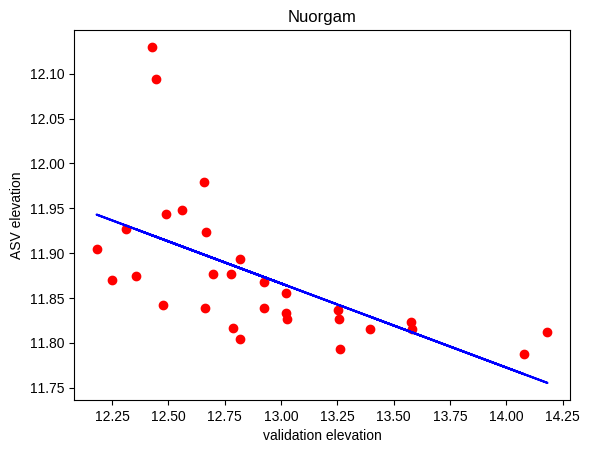

In [87]:
plt.scatter(x, y, color = 'red')
plt.plot(x, model.predict(x), color = 'blue')
plt.title('Nuorgam')
plt.xlabel('validation elevation')
plt.ylabel('ASV elevation')
plt.show()

In [88]:
# for valle asv
x = valle_asv[['Elevation']]
y = valle_asv[['ASV_Elevation']]

In [89]:
model.fit(x, y)

r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

R-squared value: 0.44577947248012084


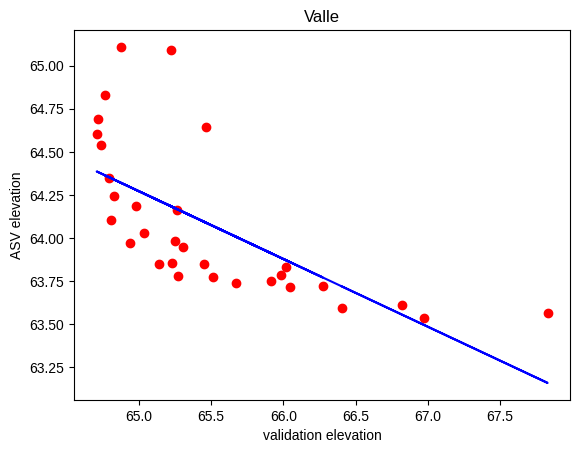

In [90]:
plt.scatter(x, y, color = 'red')
plt.plot(x, model.predict(x), color = 'blue')
plt.title('Valle')
plt.xlabel('validation elevation')
plt.ylabel('ASV elevation')
plt.show()

In [91]:
valle_als['IDW_N2000'] = valle_als['IDW'] - 24.3

In [92]:
# valle als
x = valle_als[['Elevation']]
y = valle_als[['IDW_N2000']]

In [93]:
model.fit(x, y)

r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

R-squared value: 0.981994064920988


Text(0.35, 0.5, 'R$^2$: 0.98')

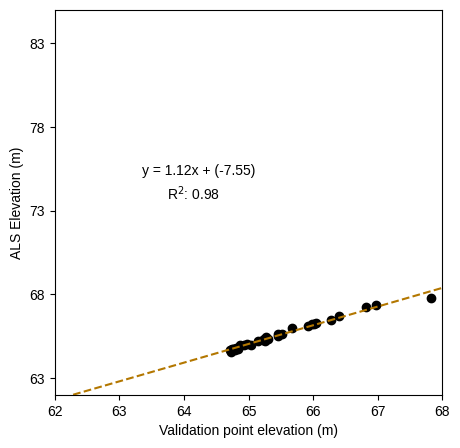

In [96]:
predict = model.predict(x)
r2 = regression_estimators.r_sq(model=model, x=x, y=y)

fig, ax = plt.subplots(figsize=(5,5))

#regression part
intercept = regression_estimators.interc(model=model)
slope = regression_estimators.coeff(model=model)

#ax.set_title('Utsjoki ALS elevation correlation')
ax.set_xlabel("Validation point elevation (m)")
ax.set_ylabel("ALS Elevation (m)")

setup_utsjoki_ax(ax)

#ax.plot(x, predict, color='#B37700', linestyle='--', zorder=0)
ax.scatter(x, y, color='black', zorder=1)
# plot fitted y = m*x + b
ax.axline(xy1=(0, intercept), slope=slope, color='#B37700', linestyle='--')
#fit_eqn = f'$y = {slope:.2f}x{intercept:+.2f}$'
fit_eqn2 = "y = {:4.2f}x + ({:4.2f})".format(slope, intercept)

fig.text(0.3, 0.55, fit_eqn2, fontsize=10)
fig.text(0.35, 0.50, f'R$^2$: {round(r2, 2)}', fontsize=10)

In [97]:
#fig.savefig('../plots/valle_als_correlation.png')
plotting.save_plot(fig=fig, name="valle_als_validation_correlation", dpi=600)